# Redes neuronales

En el siguiente proyecto expondremos ejemplos sobre el funcionamiento de las redes neuronales. Para una mejor comprensión, llevaremos a cabo una introducción sobre las redes neuronales, explicando brevemente qué son y cómo funcionan.

Una Red Neuronal Artificial (RNA) es un modelo matemático inspirado en el comportamiento biológico de las neuronas y en cómo se organizan formando la estructura del cerebro. Las neuronas de la red se encuentran distribuidas en diferentes capas de neuronas, de manera que las neuronas de una capa están conectadas con las neuronas de la capa siguiente, a las que pueden enviar información.

Una estructura común de red neuronal consistiría en:

Una primera capa de entrada, que recibe información del exterior (datos).
Una serie de capas intermedias (capas ocultas) encargadas de realizar el trabajo de la red.
Una capa de salida que proporciona el resultado del trabajo de la red al exterior.
El número de capas intermedias y el número de neuronas de cada capa dependerá de la aplicación que se vaya a dar a la red neuronal.

Así, las capas están formadas por una serie de 'nodos' interconectados que contienen una 'función de activación'. Como hemos dicho, los datos entran en la red a través de la "capa de entrada", que se comunica con una o más "capas ocultas" donde el procesamiento real se realiza a través de un sistema de 'conexiones' ponderadas. Las capas ocultas se vinculan a una "capa de salida" donde la respuesta se muestra como se muestra en el siguiente gráfico.

La mayoría de las RNA contienen una función de aprendizaje que modifica el peso de las conexiones de acuerdo con los patrones de entrada. En este sentido, del mismo modo que un niño aprende a reconocer los distintos animales a partir de ejemplos de animales, las redes neuronales aprenden a partir de ejemplos.

En esta línea, hablaremos de backpropagation como una abreviatura de la propagación hacia atrás del error. Es un concepto importante puesto que es el mecanismo que permite la optimización de pesos en la red neuronal con el objetivo de disminuir la función de coste.

De forma más simple, cuando una red neuronal recibe un patrón realiza una predicción aleatoria de lo que podría ser. Después, observa cómo de lejos está su respuesta del valor real y lleva a cabo un ajuste a los pesos de conexión.

Así, el objetivo es obtener los pesos que minimizan la función de coste, que suele medirse con RMSE. Para encontrar esos puntos, la red utiliza el descenso del gradiente.

De este modo, resumimos a continuación el procedimiento de optimización que utilizaremos en un posterior ejemplo:

Empezamos con un conjunto aleatorio de pesos (weights)
Usamos forward propagation para hacer la predicción
Usamos backward propagation para calcular la pendiente de la función de coste con respecto a cada peso
Multiplicamos dicha pendiente por el learning rate, y sustraemos del peso actual.
Continuamos el ciclo hasta encontrar la parte llana
A veces calculamos las pendientes solo con un subset de los datos (batch), cuando calculamos cada pendiente con un batch, halamos del gradiente descendente estocástico. Dentro del descenso del gradiente cada vez que vamos por el training data, se llama epoch.

En el descenso del gradiente estocástico (SGD), como solo cogemos un batch cada vez (cada iteración), el procedimiento es mas ruidoso (mas aleatorio) que el procedimiento normal. Sin embargo, acorta el tiempo de entrenamiento.

En la actualidad, estas redes neuronales cuentan con una gran popularidad, y esto es debido principalmente a su gran precisión, en concreto a que son capaces de aprovechar el gran volúmen de datos con el que se cuenta. A diferencia de otros modelos tradicionales que llegado a un punto, su desempeño no aumenta por muchos más datos que se le suministre, las redes neuronales sí que son capaces de hacerlo, tal y como muestra el gráfico:



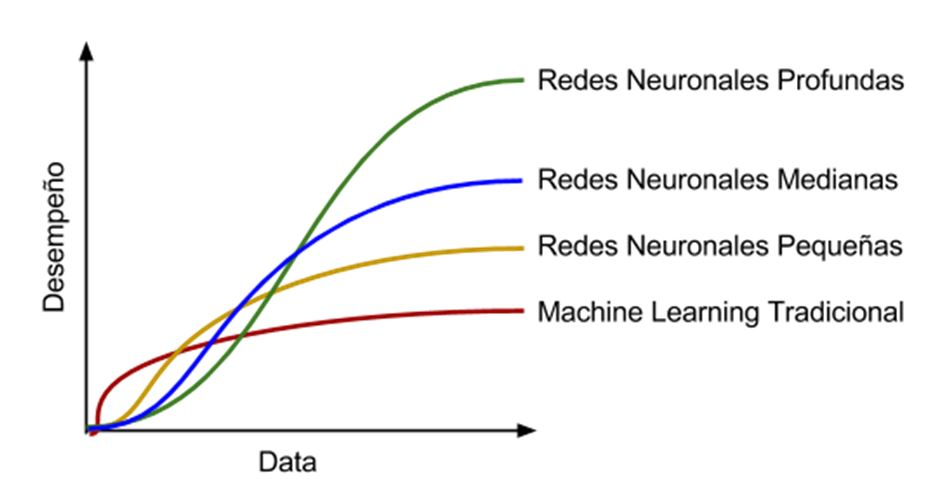

## 2. Programando el una Red Neuronal 'a pelo'

Para comenzar a aprender el funcionamiento de las redes neuronales, comenzaremos la metodología seguida en clase de programar desde 0 para posteriormente introducir librerías y módulos para conseguir mejores resultados y enfrentar programas más complejos.

Nuestra red neuronal tendrá la siguiente forma. Al tener una única capa no podríamos considerarlo Deep Learning (al menos dos capas ocultas) 

En amarillo está representado los inputs y en naranja el output. En verde está representada la capa oculta. Usaremos como función de activación la Relu, que tal y como hemos explicado anteriormente nos devuelve el másimo entre 0 y el número que tiene como output. Lo cual nos dará un número positivo.

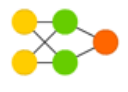

In [19]:
import numpy as np

Creamos los datos iniciales, el *input*, y los pesos:

In [30]:
###### FORWARD PROPAGATION ########
# Creamos los datos iniciales de las dos variables

input_data = np.array([12,35])

# Asignamos los pesos.
weights = {'node_0': np.array([1,1]),
           'node_1': np.array([-33,2]),
           'node_0_0': np.array([1,1]),
           "node_0_1" : np.array([-1,2]),
           "node_1_0" : np.array([-5,1]),
           "node_1_1" : np.array([-1,7]),
           "output": np.array([2,-1])
    
}

Calculamos en primer lugar los inputs de los nodos de la capa oculta:

In [31]:
# Nodo 0
node_0_value = ( input_data* weights["node_0"]).sum()

# Nodo 1
node_1_value = ( input_data* weights["node_1"]).sum()



Ahora calculamos los outputs de los *hidden layers* que en este caso sería, despues de ponderarlos por sus respectivos outputs, el output final del modelo:

In [32]:
# Outputs de los nodos
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Los ponderamos por sus pesos para obtener el resultado final
output = (hidden_layer_outputs * weights["output"]).sum()

# Mostramos el resultado final
print(output)


420


Ahora queremos mejorarla o aproximarla en mayor medida a una red neuronal seria, añadiendole funciones de activación a las neuronas ocultas. Las funciones de activación ya se han introducido, por lo que diremos que usaremos una Relu. Recordar que se puede utilizar diferentes funciones de activación, aunque en cada capa la función debe ser la misma.

Creamos nuestra propia función Relu.

In [28]:
def relu(input):
    output = max(0, input)
    return(output)

Y vovlemos a repetir el proceso anterior, esta vez calculando los outputs de las neuronas ocultas, que será el resultado de aplicar la función de activación al input recibida por esta.

In [33]:
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)


node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)


hidden_layer_outputs = np.array([node_0_output, node_1_output])

model_output = (hidden_layer_outputs * weights['output']).sum()

# vemos el resultado
print(model_output)

94


Comprobamos como al existir inputs negativos sobre las neuronas ocultas, la función de activación que en nuestro caso nos los convierte a 0, hace que el resultado sea diferente.

### Multi-Layer Neural Networks

Una vez explicamos los conceptos clave, nos diponemos a crear una red neuronal que en este casi **sí** tenga dos capas ocultas. Lo hacemos creando una función que nos permita reutilizar el código.

In [35]:
def predict_with_network(input_data,weights):

    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)


    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)


    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])


    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)


    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])
    

    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Devolvemos los resultados
    return(model_output)

output = predict_with_network(input_data,weights)
print(output)

-359


### Optimización de los pesos 

Tal y como hemos explicado en la primera parte de este documento, un concepto clave en la RRNN es la optimización de sus pesos. De hecho, se suele empezar con unos pesos aleatorios que se van optimizando con cada *epoc*.

Volvemos a definir una funcion que nos calcule el modelo, para posteriormente tratar de optimizar el valor de sus pesos:

In [36]:
def predict_with_network_simple(input_data_row, weights):


    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)


    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    

    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)

    return(model_output)


Una vez la tenemos creada, definimos el imput data y los pesos.

In [38]:
input_data = np.array([0, 3])


weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

target_actual = 3


model_output_0 = predict_with_network_simple(input_data, weights_0)



Una vez tenemos el modelo, calculamos los errores y tratamos de actualizar los pesos. En este caso fijaremos los pesos manualmente a modo ilustrativo, pero realmente se haría mediante por ejemplo un descenso del gradiente estocástico.

In [39]:
error_0 = model_output_0 - target_actual

weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

model_output_1 = predict_with_network_simple(input_data, weights_1)

error_1 = model_output_1 - target_actual

print(error_0)
print(error_1)


6
0


Vemos como con los pesos fijados al azar el error es de 6, y posteriormente con los pesos actualizados (en este caso manualmente) el error es 0.

Con esto concluimos esta primera parte de introducción, y le invitamos a continuar la lectura con el primer ejemplo sobre un dataset real (Give me some credit de Kaggle), usando Keras.

[Siguiente :  Ejemplo 1 - Redes Neuronales Keras](../Trabajo Redes Neuronales/Ejemplo_1_Keras.ipynb)

Biblio:

Pages.cs.wisc.edu. (2018). A Basic Introduction To Neural Networks. [online] Disponible en: http://pages.cs.wisc.edu/~bolo/shipyard/neural/local.html

A Basic Introduction To Neural Networks
pages.cs.wisc.edu
A Basic Introduction To Neural Networks What Is A Neural Network? The simplest definition of a neural network, more properly referred to as an 'artificial' neural ...

.
1800059, M. (2018). Redes neuronales artificiales - fundamentos, modelos y aplicaciones (página 2) - Monografias.com. [online] Monografias.com. Disponible en: http://www.monografias.com/trabajos12/redneur/redneur2.shtml [Accessed 12 Feb. 2018].

A Quick Introduction to Neural Networks. (2018). [Blog] The Data Science Blog. [online] Disponible en: https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/

A. W. Harley, 2015. An Interactive Node-Link Visualization of Convolutional Neural Networks. Ryerson University. [online] Disponible en: http://scs.ryerson.ca/~aharley/vis/harley_vis_isvc15.pdf
